# Nombre de Proyecto
---

Autores:
* Giovanny Alejandro Cuervo Londoño


In [1]:
!pip install selenium
#!apt install chromium-chromedriver
!pip install fake_useragent
!pip install pyLDAvis==2.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97717 sha256=d69e6c1dbceb34ecd5baee5f9b477e9a38758ad4b0c7a8463fa96684505a02b2
  Stored in directory: /root/.cache/pip/wheels/d9/93/d6/16c95da19c32f037fd75135ea152d0df37254c25cd1a8b4b6c
Successfully built pyLDAvis


In [2]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 22.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap
sudo dpkg --configure -a
# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

Executing: /tmp/apt-key-gpghome.ukBkuwgBYe/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.TnpnANTUsE/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.SHcORyBMnp/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Hit:2 http://archive.ubuntu.com/ubuntu 

In [4]:
# Web scraping
import time, re
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from fake_useragent import UserAgent
# Agruegue aquí las librerías que necesite
import nltk, spacy
# Latent Dirichlet allocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.manifold import TSNE
# Graficos
import pickle, pyLDAvis
import matplotlib.pyplot as plt
from pyLDAvis import sklearn as sklearn_lda


In [5]:
from google.colab import drive
drive.mount('/content/drive')
dir = "/content/drive/MyDrive/Python/PLN/PLN UNAL ing/Proyecto/"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/drive


## 1. Entendimiento del problema
---
Agruegue una explicación de el problema que trata a solucionar. Intente dar respuesta a las siguientes preguntas:

* De dónde vienen los datos?
* Qué tipo de datos tenemos? (recuerde que el conjunto de datos debe ser enfocado a texto, pero puede que tenga algunas variables o información adicional que pueda ser de utilidad)
* En qué formato están los datos?
* Cuál es el objetivo de este proyecto?
* Quienes se beneficiarían del producto?

## 2. Web scraping
---

Implemente las funciones necesarias para cargar la información en dependencia de su procedencia (web, archivos planos, csv, bases de datos, entre otros).

In [6]:
#Timepo de espera con una Distribución de probabilidad lognormal
def distriProb_lognorm():
  pdf = np.random.lognormal(mean=2.0, sigma=0.5, size=(1))
  if pdf<3  or pdf>7:
    pdf=np.random.randint(3,6)
  return float(pdf)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [96]:
ua = UserAgent()
user_agent = ua.random
print(user_agent)

Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
# Cierra el navegador cuando hay un error
driver.quit()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [99]:
# Define el nevegador
service = Service(executable_path=r'/usr/bin/chromedriver')
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--disable-blink-features=AutomationControlled')
options.add_experimental_option('useAutomationExtension', False)
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_argument(f'user-agent={user_agent}')
# options.add_argument(f'user-agent=Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36')
# Definimos un navegador
# driver =  webdriver.Chrome('chromedriver', options=options)
driver =  webdriver.Chrome(service=service, options=options)
webpage_target = 'https://www.sciencedirect.com/'

# Colocamos el link de la pagina donde queremos hacer la busqueda
try:
    driver.get(webpage_target)
    time.sleep(distriProb_lognorm())
except:
    print('Hubo un error de conexion intentando de nuevo...')
    time.sleep(distriProb_lognorm())
    driver.refresh()
    driver.get(webpage_target)
print(driver)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<selenium.webdriver.chrome.webdriver.WebDriver (session="7c7012f48c4f92fbb7d010ff1a9c611c")>


In [64]:
current_html

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'<html lang="en"><head>\n    <meta content="text/html; charset=UTF-8" http-equiv="Content-Type">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n    <meta name="robots" content="NOARCHIVE">\n    <meta name="robots" content="noodp">\n    <meta name="robots" content="noydir">\n    <link rel="shortcut icon" href="https://sdfestaticassets-us-east-1.sciencedirectassets.com/shared-assets/16/images/favSD.ico" type="image/x-icon">\n\n    <style>/*!normalize.css v5.0.0 | MIT License | github.com/necolas/normalize.css*/.els-row-center,.els-row-center-fixed,.els-row-content{margin-left:auto;margin-right:auto}@font-face{font-family:NexusSans;src:url(data:binary/octet-stream;base64,d09GRgABAAAAAL5YABMAAAABmMwABwH4AAC8lAAAAaEAAAQJAAC+OAAAACBEU0lHAACu6AAADawAABWE4K7mfkdQT1MAAJ/8AAAOPQAAIK7A1HPaR1NVQgAArjwAAACsAAABEBnVA0xMVFNIAAAGiAAAAIYAAAIoovnt809TLzIAAAIkAAAAXgAAAGBFu3peY21hcAAAGIgAAAUhAAAIdjuwFwNjdnQgAAAfMAAAAC

In [ ]:
# Enviamos un query de busqueda a la barra de busqueda
# search_box_id = 'qs-searchbox-input'
search_box_id = 'qs'
query = 'Remote sensing'
# Get the current HTML content of the page
current_html = driver.page_source
search_box = driver.find_element(By.ID, search_box_id)
search_box.send_keys(query)
search_box.send_keys(Keys.RETURN) #click enter
# Get the current HTML content of the page
current_html = driver.page_source
# Filtramos los resultados por los que corresponden a reviews
try:
    time.sleep(distriProb_lognorm())
    reviews = driver.find_element(By.ID, "articleTypes-REV")
    driver.execute_script("arguments[0].click();", reviews)
except:
    print('Hubo un error de conexion intentando de nuevo...')
    time.sleep(10)
    driver.refresh()
    reviews = driver.find_element(By.ID, "articleTypes-REV")
    driver.execute_script("arguments[0].click();", reviews)

# Filtramos los resultados por los que corresponden a earth
try:
    time.sleep(distriProb_lognorm())
    earth = driver.find_element(By.ID, "subjectAreas-1900")
    driver.execute_script("arguments[0].click();", earth)
except:
    print('Hubo un error de conexion intentando de nuevo...')
    time.sleep(10)
    driver.refresh()
    earth = driver.find_element(By.ID, "subjectAreas-1900")
    driver.execute_script("arguments[0].click();", earth)

# Definimos 100 articulos por pagina
time.sleep(distriProb_lognorm())
xpath_100 = "//a[@class='anchor' and @data-aa-name='srp-100-results-per-page']"
first_100 = driver.find_element(By.XPATH, xpath_100)
driver.execute_script("arguments[0].click();", first_100)
# Extreamos el html
time.sleep(distriProb_lognorm())
soup = BeautifulSoup(driver.page_source, 'html.parser')
art_html = soup.find_all('a', 'anchor result-list-title-link u-font-serif text-s anchor-default', 'rev')
link_list = [link.get('href') for link in art_html]
# Extrae la cantidad de paginas de resultados de busqueda
html_pages = soup.find_all('ol', id='srp-pagination')
N = int(re.findall(r"(?<=of) \d+", str(html_pages))[0])
print(f'Numero de paginas {N}')

In [ ]:
# Itera sobre cada pagina de los resultados de busqueda
for _ in range(N-1):
    # Siguiente pagina
    time.sleep(distriProb_lognorm())
    xpath_next = "//a[@class='anchor' and @data-aa-name='srp-next-page']"
    next_100 = driver.find_element(By.XPATH, xpath_next)
    driver.execute_script("arguments[0].click();", next_100)

    # Extreamos el html
    time.sleep(distriProb_lognorm())
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    art_html = soup.find_all('a', 'anchor result-list-title-link u-font-serif text-s anchor-default', 'rev')
    # Extreamos el link del html
    next_link_list = [link.get('href') for link in art_html]
    # Se añade a una lista
    link_list.extend(next_link_list)
    print(len(link_list))

df = pd.DataFrame({'link': link_list})
df['link'] = df['link'].map(lambda link: 'https://www.sciencedirect.com'+link)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


200
236


,link
0,https://www.sciencedirect.com/science/article/...
1,https://www.sciencedirect.com/science/article/...
2,https://www.sciencedirect.com/science/article/...
3,https://www.sciencedirect.com/science/article/...
4,https://www.sciencedirect.com/science/article/...


In [ ]:
df.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,link
231,https://www.sciencedirect.com/science/article/...
232,https://www.sciencedirect.com/science/article/...
233,https://www.sciencedirect.com/science/article/...
234,https://www.sciencedirect.com/science/article/...
235,https://www.sciencedirect.com/science/article/...


In [ ]:
# Extraemos los abstracts uno por uno
abstracts = []
titles = []
iter = 0
for link in df['link']:
  iter += 1
  print(f'iteracion {iter}')
  driver.get(link)
  time.sleep(distriProb_lognorm())
  soup = BeautifulSoup(driver.page_source, 'html.parser')
  html_title = soup.find_all('span', 'title-text')
  title_text = re.sub(r"\<[^>]+>", ' ', str(html_title))
  title_text = re.sub(r"\s+", ' ', str(title_text))
  print(title_text)
  titles.append(title_text)
  print(len(titles))
  rexp = re.compile(r"\<[^>]+>|Summary|Abstract|•")
  html_abstract = soup.find_all('div', class_=re.compile("(abstract author|abstract author xh-highlight)"))
  abstract_text = re.sub(rexp, ' ', str(html_abstract))
  abstract_text = re.sub(r'\s+', ' ', str(abstract_text))
  abstract_text = ''.join(abstract_text)
  print(abstract_text)
  abstracts.append(abstract_text)
  print(len(abstracts))

time.sleep(distriProb_lognorm())
driver.close()

iteracion 1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[ Applications of unmanned aerial vehicle (UAV) surveys and Structure from Motion photogrammetry in glacial and periglacial geomorphology ]
1
[ Highlights UAVs have been used in 62 publications in glacial and periglacial geomorphology. Change detection and geomorphological mapping were the most popular themes. Nearly 84% of the multirotors used in publications were produced by DJI. The Ground Sampling Distance (GSD) varied from 0.02 m to 0.20 m. Autonomous flight programming was declared in 35 publications. , Unmanned aerial vehicles (UAVs, UAS, drones) combined with Structure-from-Motion (SfM) photogrammetry have emerged over the last decade as the basis for a very efficient workflow in glacial and periglacial geomorphology by filling the spatial gap between traditional ground-based surveys and aerial or satellite remote sensing data. UAV-generated data offer flexible spatial and temporal resolution, thus enabling a shift from a pure description of geomorphological forms to a better u

In [ ]:
df['Titles'] = titles
df['Abstracts'] = abstracts
df.to_csv('abstract_pln_earth.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 2. Carga de datos
---

Implemente las funciones necesarias para cargar la información en dependencia de su procedencia (web, archivos planos, csv, bases de datos, entre otros).

In [ ]:
df = pd.read_csv('abstract_pln_earth.csv')
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,link,Titles,Abstracts
0,0,https://www.sciencedirect.com/science/article/...,[ Applications of unmanned aerial vehicle (UAV...,[ Highlights UAVs have been used in 62 publica...
1,1,https://www.sciencedirect.com/science/article/...,"[ Review of drones, photogrammetry and emergin...",[ Dykes play a major role in transporting magm...
2,2,https://www.sciencedirect.com/science/article/...,[ Integration of ground-based laser scanner an...,[ This work deals with the integration of diff...
3,3,https://www.sciencedirect.com/science/article/...,[ A novel methodology for the structural asses...,[ Arches are the most common structural shape ...
4,4,https://www.sciencedirect.com/science/article/...,[ Ground-based and UAV-Based photogrammetry: A...,[ Highlights We review the methods and applica...
...,...,...,...,...
231,231,https://www.sciencedirect.com/science/article/...,[ A survey of landmine detection using hypersp...,[ Hyperspectral imaging is a trending techniqu...
232,232,https://www.sciencedirect.com/science/article/...,[ Hyperspectral remote sensing detection of pe...,[ Remote detection and mapping of hydrocarbons...
233,233,https://www.sciencedirect.com/science/article/...,[ Multi-objective based spectral unmixing for ...,[ Sparse hyperspectral unmixing assumes that e...
234,234,https://www.sciencedirect.com/science/article/...,[ Full-waveform topographic lidar: State-of-th...,[ Airborne laser scanning (ALS) is an active r...


In [ ]:
# Definimos una funcion para buscar palabras en la columna de abstracts
def find_word(word):
  idx = df['Abstracts'].apply(lambda x: re.match(fr'.+{word}.+', x)).values.nonzero()[0]
  mask = df.index.isin(list(idx))
  return df.loc[mask]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Buscamos la palabra en el df
find_word('SGD')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: ignored

In [ ]:
# Creamos nuestro corpus
corpus = df['Abstracts'].to_list()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 3. Preprocesamiento
---

Se definió una función para preprocesar los *abstracts* de cada artículo aplicando las siguientes operaciones:

* Eliminar caracteres especiales con regex.
* Eliminar tildes.
* Eliminar stopwords.
* Eliminar palabras de una longitud mínima.

In [ ]:
# Definimos el tokenizador
wpt = nltk.WordPunctTokenizer()
# Definimos las stopwords
nltk.download("stopwords")
stop_words = nltk.corpus.stopwords.words('english')
stop_words.extend(['review', 'highlight', 'highlights', 'research', 'study', 'studies', 'also'])

# Definimos el preprocesamiento
def preprocess(doc):
    # Se eliminan caracteres especiales
    doc = re.sub(r'[^a-zA-Z\s]', '', doc)
    # Se convierten los téxtos a minúsculas
    doc = doc.lower().strip()
    tokens = wpt.tokenize(doc)
    # Se eliminan las stopwords
    tokens = [token for token in tokens
              if token not in stop_words and len(token) > 2]
    # Retornamos una versión filtrada del texto
    return ' '.join(tokens)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Preprocesamos el texto
norm_corpus = list(map(preprocess, corpus))
norm_corpus[0]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'uavs used publications glacial periglacial geomorphology change detection geomorphological mapping popular themes nearly multirotors used publications produced dji ground sampling distance gsd varied autonomous flight programming declared publications unmanned aerial vehicles uavs uas drones combined structurefrommotion sfm photogrammetry emerged last decade basis efficient workflow glacial periglacial geomorphology filling spatial gap traditional groundbased surveys aerial satellite remote sensing data uavgenerated data offer flexible spatial temporal resolution thus enabling shift pure description geomorphological forms better understanding processform relationships quantification shortterm landscape changes response various drivers contribution present overview current applications uavsfm modern past glacial environments include mostly geomorphological mapping changedetection analysis indicate potential future applications combining uavdata historical archives terrestrial sfm crowd

**Análisis exploratorio de datos**

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


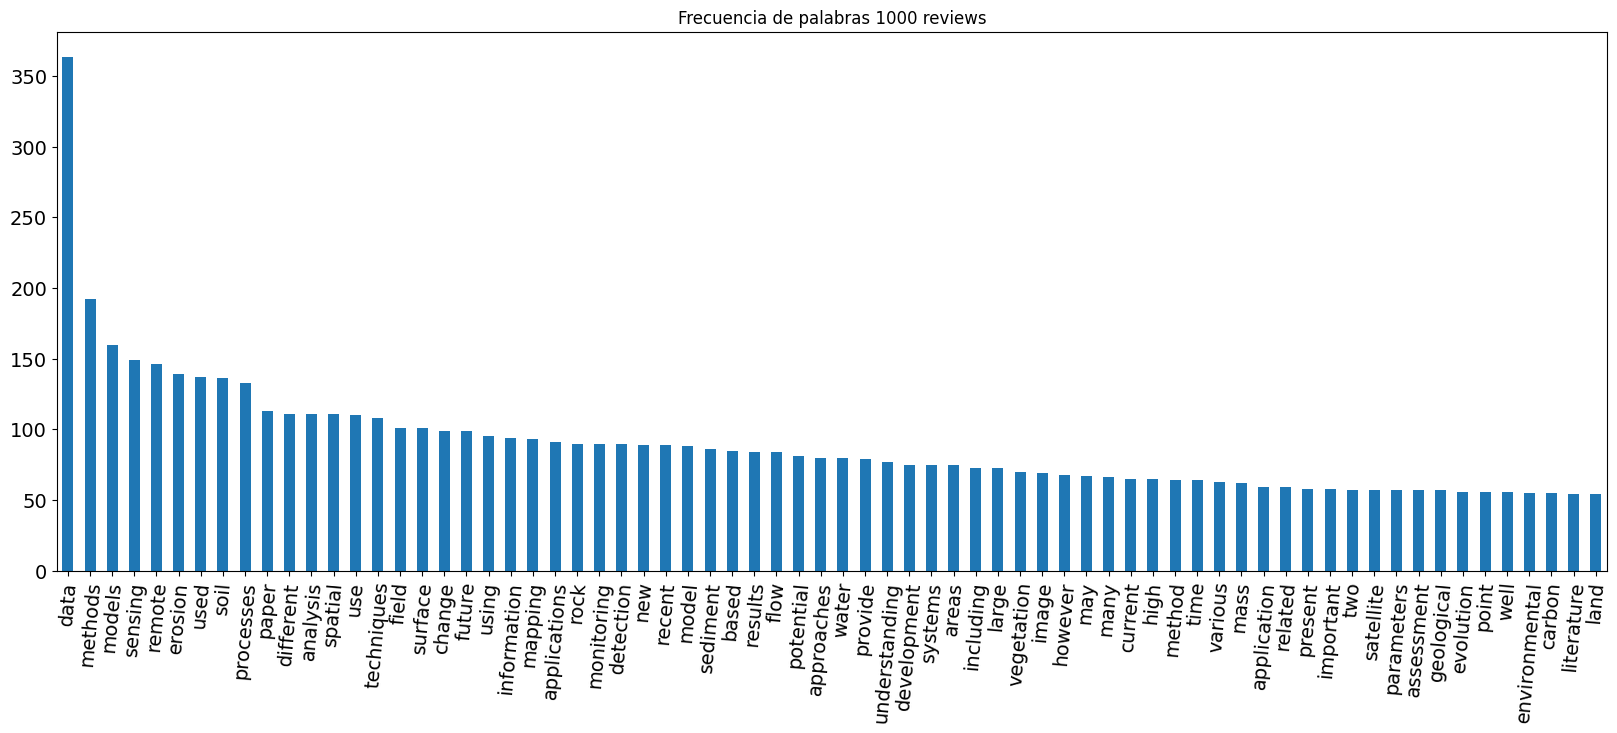

In [ ]:
from nltk.probability import FreqDist
# Definimos el tokenizador
tokenizer = nltk.WordPunctTokenizer()
# Toquenizamos por palabra
word_tokens = tokenizer.tokenize(' '.join(norm_corpus))
# Creamos un grafico de frecuencias de palabras
frec_words = FreqDist(word_tokens)
fig = plt.figure(figsize =(20, 7))
pd.Series(dict(frec_words)).sort_values(ascending=False)[:70].plot(kind='bar', rot=85, fontsize=14,
                                                                 title='Frecuencia de palabras 1000 reviews');

Se observa que los términos más frecuentes son: *coastal, marine, water, sea, management, etc.*

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


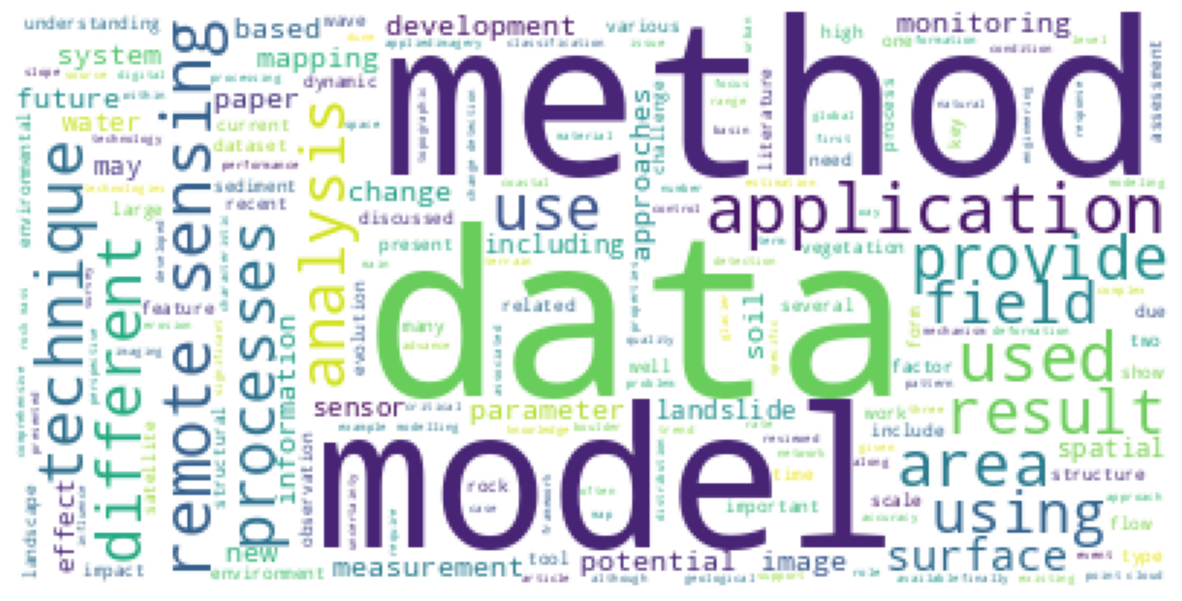

In [ ]:
from wordcloud import WordCloud
# Unimos el corpus en un string
long_string = ','.join(norm_corpus)
# Creamos un objeto wordcloud
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generamos una wordcloud
wordcloud = wordcloud.generate(long_string)
# Visualizamos el wordcloud
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

En la nube de palabras se observa que los términos más frecuentes presentan un mayor tamaño respecto a los demás.

## 4. Extracción de Características
---

Se definió una función que generara una matriz de bolsa de documentos (vector de características a nivel documento).

In [ ]:
# Matriz de bolsa de documentos
def feature_extraction(corpus):
    bow = CountVectorizer(
        max_df=0.5
        )
    bow.fit(corpus)
    X_bow = bow.transform(corpus).toarray()
    return X_bow, bow

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Bolsa de palabras
X_bow, bow = feature_extraction(norm_corpus)
X_bow.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(236, 6807)

## 5. Modelamiento
---

Para el objetivo de este proyecto se seleccionó el modelo de **Latent Dirichlet Allocation** dado que este permite explorar un número definido de tópicos para finalmente hallar los tópicos más relevantes dentro de la oceanografía costera.


In [ ]:
# Se define 10 topicos a explorar
topics = 10
# Definimos una funcion de entrenamiento
def training(data, topics):
    lda = LDA(n_components=topics, n_jobs=-1, random_state=0)
    lda.fit(X_bow)
    return lda

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Entrenamos el modelo
lda = training(X_bow, topics)
lda

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_jobs=-1, random_state=0)

In [ ]:
# Listamos los topicos encontrados junto con los palabras mas fecuentes
terms = bow.get_feature_names_out()
for i, comp in enumerate(lda.components_):
    # Juntamos los términos con cada uno de los valores en la matriz V
    terms_comp = zip(terms, comp)
    # Ordenamos los términos de acuerdo al resultado de LSA
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    # Mostramos los términos más importantes en cada tópico
    print("Tópico {}: {}".format(i," ".join(list(map(lambda x:x[0], sorted_terms)))))

Tópico 0: structure complexity current testing tls leaf lava tubes delta measures
Tópico 1: models methods image flow point sediment images cloud photogrammetric clouds
Tópico 2: monitoring nbs remote used mapping sensing marine plastic detection spectral
Tópico 3: erosion soil sediment sensing remote processes methods spatial techniques future
Tópico 4: rill rock carbon models erosion processes stress vegetation approaches parameters
Tópico 5: change methods detection models sensing fuel remote applications paper use
Tópico 6: flow fracture surface geological roughness structures level potential digital vegetation
Tópico 7: methods different imaging used paper uhi areas results effect techniques
Tópico 8: waves used landslide mapping methods hazard landslides approaches sar change
Tópico 9: soil quality rock water monitoring basin mass areas model vegetation


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Visualización de resultados**

In [ ]:
X_topics = lda.transform(X_bow)
# Utilizamos TSNE para visualizar el espacio de los tópicos
tsne = TSNE(
        n_components=2,
        random_state=0,
        n_iter=1000,
        perplexity=2,
        verbose=1
        )
T = tsne.fit_transform(X_topics)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 236 samples in 0.001s...
[t-SNE] Computed neighbors for 236 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 236 / 236
[t-SNE] Mean sigma: 0.000205
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.550259
[t-SNE] KL divergence after 1000 iterations: 0.232442


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


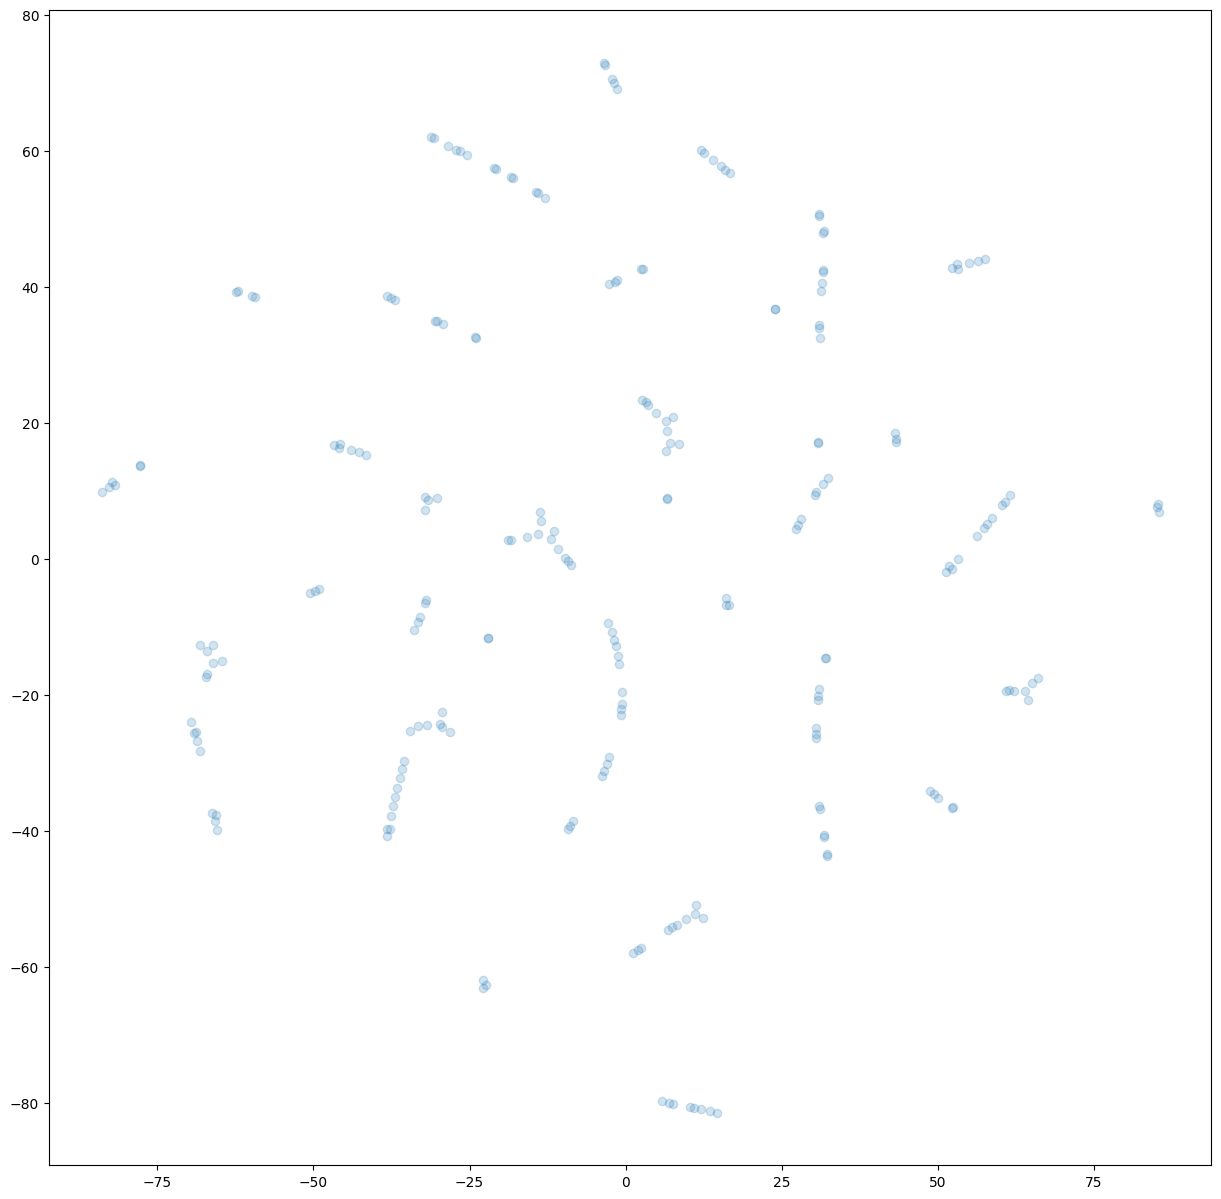

In [ ]:
# Graficamos un TSNE
idx = np.arange(len(corpus))
plt.figure(figsize=(15, 15))
n_docs = 100
idx = np.arange(len(corpus))
valid_idx = np.random.choice(idx, replace=False, size=n_docs)
plt.scatter(T[:, 0], T[:, 1], alpha=0.2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


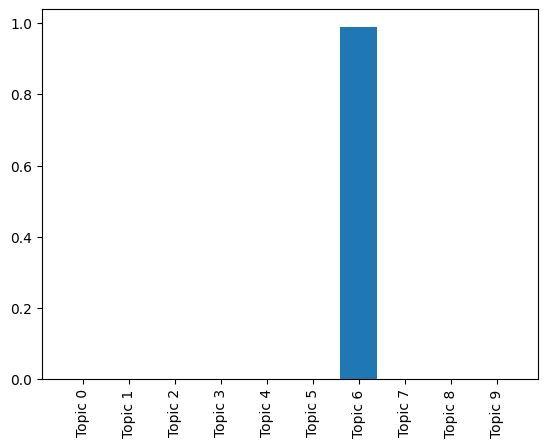

In [ ]:
# Los topicos mas relevantes dentro de un documento
fig, ax = plt.subplots()
Article = 2
ax.bar([f"Topic {i}" for i in range(topics)], np.abs(X_topics[Article]))
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

In [ ]:
# Visualizamos lo topicos encontrados
pyLDAvis.enable_notebook()
LDAvis_data_filepath = "./ldavis_prepared"

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X_bow = bow.transform(norm_corpus)
LDAvis_prepared = sklearn_lda.prepare(lda, X_bow, bow)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


In [ ]:
with open(LDAvis_data_filepath,"rb") as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, "./ldavis_prepared.html")
LDAvis_prepared

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.105387 -0.031714       1        1  20.685243
8      0.074156 -0.037581       2        1  13.956602
5      0.070457 -0.045137       3        1  13.002567
4      0.031100  0.018746       4        1  11.028219
6      0.003706  0.171988       5        1   9.358221
9      0.003276 -0.022147       6        1   9.081966
1     -0.012089  0.052400       7        1   8.539842
7     -0.031721 -0.037694       8        1   5.850098
2     -0.113375 -0.080724       9        1   4.964867
0     -0.130896  0.011863      10        1   3.532373, topic_info=            Term        Freq       Total Category  logprob  loglift
2005     erosion  126.000000  126.000000  Default  30.0000  30.0000
5679        soil  119.000000  119.000000  Default  29.0000  29.0000
5233        rill   32.000000   32.000000  Default  28.0000  28.0000
2339        flow   70.000000   70.000000  Default  27.0000  27.0000
3854  monitoring   73.000000   73.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
1286       cover    3.491203   37.522697  Topic10  -5.9059   0.9685
2690      growth    3.243757   18.817470  Topic10  -5.9794   1.5851
5504     several    3.350485   42.019787  Topic10  -5.9470   0.8142
4324       paper    3.422601   96.496852  Topic10  -5.9257   0.0041
1610     digital    3.350478   43.731148  Topic10  -5.9470   0.7742

[705 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
44        1  0.052569    accuracy
44        2  0.105138    accuracy
44        3  0.367984    accuracy
44        5  0.105138    accuracy
44        6  0.183992    accuracy
...     ...       ...         ...
6707      5  0.068155  weathering
6728      7  0.916928         wet
6739      3  0.926821  widelyused
6782      7  0.872761  wspointnet
6783      7  0.916928         wss

[1772 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 9, 6, 5, 7, 10, 2, 8, 3, 1])

En este **Mapa de Distancia Intertópicos** es posible observar 3 clúster bien definidos:

1. Un grupo de tópicos localizado a la izquierda del mapa y conformado por 5 tópicos; tópico 1, cuyas palabras más frecuentes son: clima, cambio, gestión, ecosistemas e impacto; tópico 2, con palabras frecuentes como: ambiente, contaminación, microplásticos; tópico 9, relacionado con las palabras: pesquerías, peces e hidrocarburos; tópico 5, cuyas palabras más frecuentes son: sensores, satélite, monitoreo y sgd; y tópico 7, con palabras frecuentes como: servicios ecosistémicos, reclamación, Antártica y degradación.

2. Otro grupo localizado a la derecha superior y conformado por 4 tópicos: tópico 4,  relacionado con: energía, marina, corrientes, mareas, olas, clima y viento; tópico 8, con palabras como: surgencia (upwelling), nutrientes, producción, plataforma y temperatura; tópico 6, cuyas palabras más frecuentes son: carbono, azul, orgánico, sedimento, turbas y enterramiento; y tópico 3, relacionado con las palabras: tsuanmi, nivel del mar, sedimentos, línea de costa y evolución.

3. El último grupo conformado por el tópico 10 donde las palabras más frecuentes son: subducción, continental, tectónica, corteza y magmatismo.

## 6. Evaluacion
---

Se evaluó el modelo implementado por medio de la métrica de **perplejidad** utilizando un conjunto de entrenamiento (0.75) y de evaluación (0.25). Dicha métrica, decrese de forma monotónica al aumentar la verosimilitud geométrica media de la palabra en el documento, es decir es inversamente proporcional, por lo que un **valor bajo** de perplejidad indica una mejor desempeño en la generalización del modelo.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X_bow, random_state=0, shuffle=True)
# Entrenamos el modelo
topics = 10
lda_train = training(X_train, topics)
lda_train

LatentDirichletAllocation(n_jobs=-1, random_state=0)

In [ ]:
def evaluate(model, data):
    perplexity = model.perplexity(data)
    return perplexity

In [ ]:
perplexity_list = []
for n_topic in range(1, 30):
  lda_trained = training(X_train, n_topic)
  perplexity_list.append(evaluate(lda_trained, X_test))

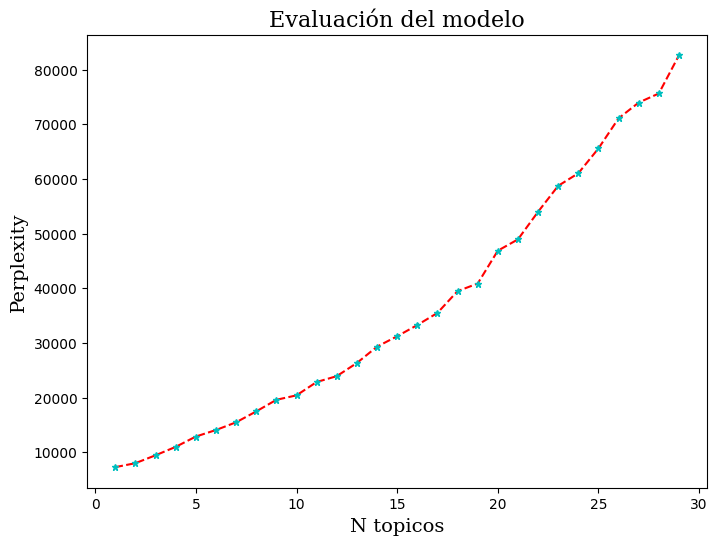

In [ ]:

plt.figure(dpi = 100, figsize = (8, 6))
plt.title('Evaluación del modelo',
          fontdict= dict(family ='serif', size = 16))
plt.xlabel('N topicos',
           fontdict= dict(family ='serif', size = 14))
plt.ylabel('Perplexity',
           fontdict= dict(family ='serif', size = 14))
topic_num_list = [i for i in range(1, 30)]
plt.plot(topic_num_list, perplexity_list, '--r')
plt.plot(topic_num_list, perplexity_list, 'c*', ms = 5)
plt.show()